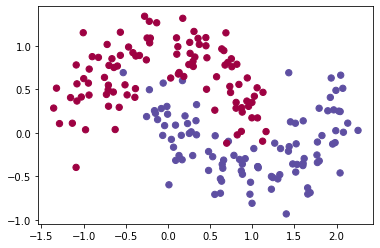

In [2]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt 
from random import sample 
from mpl_toolkits import mplot3d
%matplotlib inline
np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise = 0.20)
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

In [155]:
num_examples = len(x)
nn_input_dim = 2
nn_output_dim = 2

epsilon = 0.01
reg_lambda = 0.01


In [154]:
def calcualte_loss(model):
  global reg_lambda
  global num_examples
  W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

  z1 = x.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)

  correct_logprobs = -np.log(probs[range(num_examples), y])
  data_loss = np.sum(correct_logprobs)

  data_loss += reg_lambda / 2 * (np.sum(np.square(W1))) + np.sum(np.square(W2))
  return 1.0 / num_examples * data_loss

In [153]:
def predict(model, X):
  W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

  z1 = X.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
  return np.argmax(probs, axis = 1)

In [152]:
def build_model(nn_hdim, num_passes = 20000, print_loss = False):
  global epsilon
  global nn_input_dim
  global nn_output_dim
  global num_examples
  np.random.seed(0)
  W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
  b1 = np.zeros((1, nn_hdim))
  W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
  b2 = np.zeros((1, nn_output_dim))

  model = {}

  for i in range(0, num_passes):
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)

    delta3 = probs
    delta3[range(num_examples), y] -= 1
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis = 0, keepdims = True)
    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
    dW1 = np.dot(x.T, delta2)
    db1 = np.sum(delta2, axis = 0)

    dW2 += reg_lambda * W2
    dW1 += reg_lambda * W1

    W1 += -epsilon * dW1
    b1 += -epsilon * db1
    W2 += -epsilon * dW2
    b2 += -epsilon * db2

    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    if print_loss and i % 1000 == 0:
      print("Iteration: {} Loss: {}", i, calcualte_loss(model))

  return model

soale 1:

In [23]:
model = build_model(3)

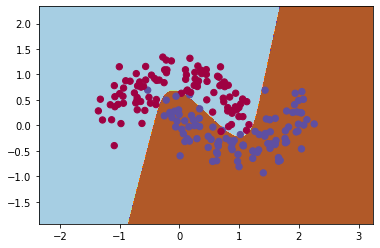

In [30]:
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

soal 2:

mibinim ke har che tedade laye haye darooni bishtar mishavad decision boundary nesbat be dade ha hasas tar mishavad va khate daghigh tari mikeshad va be hamin tartib overfit mikonad

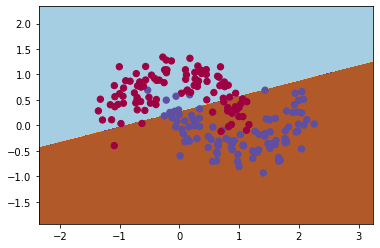

In [31]:
model = build_model(1)
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

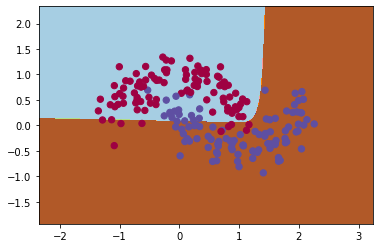

In [32]:
model = build_model(2)
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

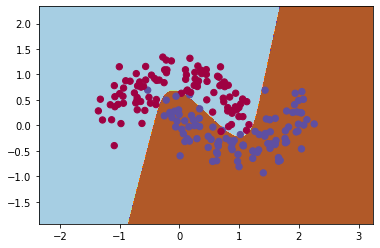

In [33]:
model = build_model(3)
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

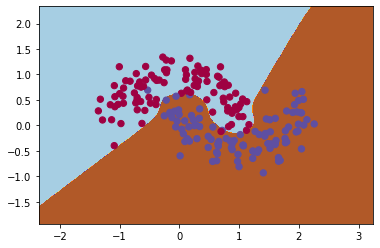

In [34]:
model = build_model(4)
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

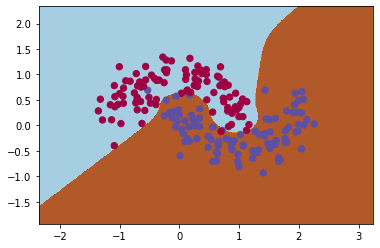

In [35]:
model = build_model(5)
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

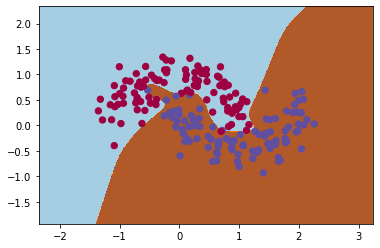

In [36]:
model = build_model(20)
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

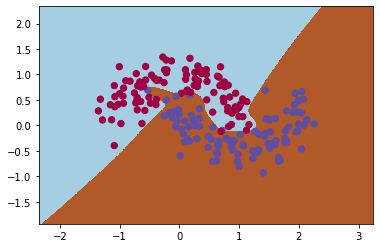

In [37]:
model = build_model(40)
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

soal 3:

data ra be batch_size ta batch taghsim mikonim ba komake slicing. va dar har iteration har dafe ke yek batch ra process kardim vazn ha ra taghir midahim.
batch j om az size / batch_size * j ta size/batch_size * (j +1) ast

In [48]:
def build_model2(nn_hdim, batch_size, num_passes = 20000, print_loss = False):
  global epsilon
  global nn_input_dim
  global nn_output_dim
  np.random.seed(0)
  W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
  b1 = np.zeros((1, nn_hdim))
  W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
  b2 = np.zeros((1, nn_output_dim))

  model = {}
  global x
  global y
  x_copy = x.copy()
  y_copy = y.copy()
  x_size = len(x)
  for i in range(0, num_passes):
    for j in range(batch_size):
      x = x_copy[(x_size // batch_size) * j: (x_size // batch_size) * (j + 1)]
      y = y_copy[(x_size // batch_size) * j: (x_size // batch_size) * (j + 1)]
      num_examples = (x_size // batch_size)
      num_examples
      z1 = x.dot(W1) + b1
      a1 = np.tanh(z1)
      z2 = a1.dot(W2) + b2
      exp_scores = np.exp(z2)
      probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)

      delta3 = probs
      delta3[range(num_examples), y] -= 1
      dW2 = (a1.T).dot(delta3)
      db2 = np.sum(delta3, axis = 0, keepdims = True)
      delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
      dW1 = np.dot(x.T, delta2)
      db1 = np.sum(delta2, axis = 0)

      dW2 += reg_lambda * W2
      dW1 += reg_lambda * W1

      W1 += -epsilon * dW1
      b1 += -epsilon * db1
      W2 += -epsilon * dW2
      b2 += -epsilon * db2

    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    if print_loss and i % 1000 == 0:
      print("Iteration: {} Loss: {}", i, calcualte_loss(model))

  x = x_copy.copy()
  y = y_copy.copy()
  return model

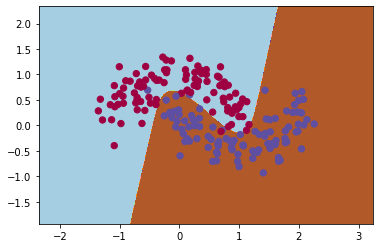

In [50]:
model = build_model2(3, 20)
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

soal 4:
har dafe learning rate ra dar 0.9997 zarb mikonim va agar az meghdari kamtar shod break mikonim chon meghdare learninge network nachiz ast va ghabele ignore

In [168]:
def build_model3(nn_hdim, learning_rate, num_passes = 20000, print_loss = False):
  epsilon = learning_rate
  global nn_input_dim
  global nn_output_dim
  global num_examples
  np.random.seed(0)
  W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
  b1 = np.zeros((1, nn_hdim))
  W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
  b2 = np.zeros((1, nn_output_dim))

  model = {}

  for i in range(0, num_passes):
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)

    delta3 = probs
    delta3[range(num_examples), y] -= 1
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis = 0, keepdims = True)
    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
    dW1 = np.dot(x.T, delta2)
    db1 = np.sum(delta2, axis = 0)

    dW2 += reg_lambda * W2
    dW1 += reg_lambda * W1

    W1 += -epsilon * dW1
    b1 += -epsilon * db1
    W2 += -epsilon * dW2
    b2 += -epsilon * db2
    epsilon *= 0.99997
    if(epsilon < 0.0001):
      break

    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    if print_loss and i % 1000 == 0:
      print("Iteration: {} Loss: {}", i, calcualte_loss(model))

  return model

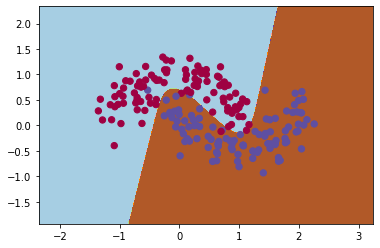

In [171]:
model = build_model3(3, 0.02)
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

soal 5:

build model ra be goone i taghir midahim be activation function va derivative ash ra af va adf voroodi begirad.

sepas an ra be relu va sigmoid test mikonim

mibinim ke dar in soal activation function haye digar khoob amal nemikonand

In [137]:
def build_model4(nn_hdim, batch_size, learning_rate, af, daf, num_passes = 20000, print_loss = False):
  global epsilon
  global nn_input_dim
  global nn_output_dim
  np.random.seed(0)
  W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
  b1 = np.zeros((1, nn_hdim))
  W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
  b2 = np.zeros((1, nn_output_dim))

  model = {}
  global x
  global y
  x_copy = x.copy()
  y_copy = y.copy()
  x_size = len(x)
  for i in range(0, num_passes):
    for j in range(batch_size):
      x = x_copy[(x_size // batch_size) * j: (x_size // batch_size) * (j + 1)]
      y = y_copy[(x_size // batch_size) * j: (x_size // batch_size) * (j + 1)]
      num_examples = (x_size // batch_size)
      num_examples
      z1 = x.dot(W1) + b1
      a1 = af(z1)
      z2 = a1.dot(W2) + b2
      exp_scores = np.exp(z2)
      probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)

      delta3 = probs
      delta3[range(num_examples), y] -= 1
      dW2 = (a1.T).dot(delta3)
      db2 = np.sum(delta3, axis = 0, keepdims = True)
      delta2 = delta3.dot(W2.T) * (daf(a1))
      dW1 = np.dot(x.T, delta2)
      db1 = np.sum(delta2, axis = 0)

      dW2 += reg_lambda * W2
      dW1 += reg_lambda * W1

      W1 += -epsilon * dW1
      b1 += -epsilon * db1
      W2 += -epsilon * dW2
      b2 += -epsilon * db2
      
      epsilon *= 0.99997
      if(epsilon < 0.0001):
        break

    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    if print_loss and i % 1000 == 0:
      print("Iteration: {} Loss: {}", i, calcualte_loss(model))

  x = x_copy.copy()
  y = y_copy.copy()
  return model

In [81]:
def sigmoid(x):
  return 1.0/(np.exp(-x) + 1)

In [89]:
def dsigmoid(x):
  return sigmoid(x) * (1 - sigmoid(x))

In [142]:
def ReLU(x):
    return x * (x > 0)

In [145]:
def dReLU(x):
    return 1. * (x > 0)

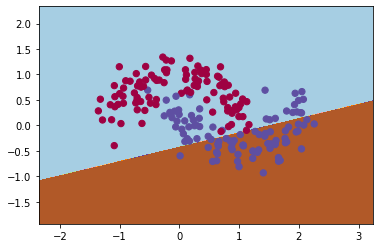

In [165]:
model = build_model4(3, 10, 0.2, sigmoid, dsigmoid)
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

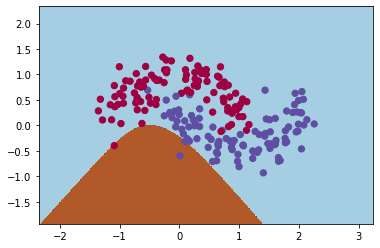

In [166]:
model = build_model4(3, 10, 0.02, ReLU, dReLU)
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

soal 6:

az make_blobs estefade mikonim ta 3 blob besazim (meghdare default) ba 2 feature (default). sepas dar code tedade node haye khorooji ra be 3 taghir midahim va digar taghiri niaz nist.

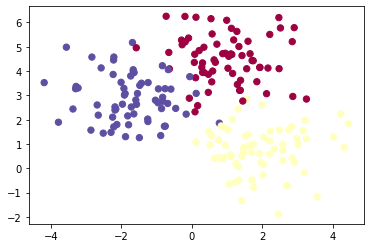

In [16]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt 
from random import sample 
from mpl_toolkits import mplot3d
%matplotlib inline
np.random.seed(0)
x, y = sklearn.datasets.make_blobs(n_samples = 200)
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

In [9]:
def predict5(model, X):
  W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

  z1 = X.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
  return np.argmax(probs, axis = 1)

In [17]:
 def build_model5(nn_hdim, x, y, num_passes = 20000, print_loss = False):
  num_examples = len(x)
  nn_input_dim = 2
  nn_output_dim = 3

  epsilon = 0.01
  reg_lambda = 0.01
  np.random.seed(0)
  W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
  b1 = np.zeros((1, nn_hdim))
  W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
  b2 = np.zeros((1, nn_output_dim))

  model = {}

  for i in range(0, num_passes):
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)

    delta3 = probs
    delta3[range(num_examples), y] -= 1
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis = 0, keepdims = True)
    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
    dW1 = np.dot(x.T, delta2)
    db1 = np.sum(delta2, axis = 0)

    dW2 += reg_lambda * W2
    dW1 += reg_lambda * W1

    W1 += -epsilon * dW1
    b1 += -epsilon * db1
    W2 += -epsilon * dW2
    b2 += -epsilon * db2

    epsilon *= 0.99997
    if(epsilon < 0.0001):
      break

    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

  return model

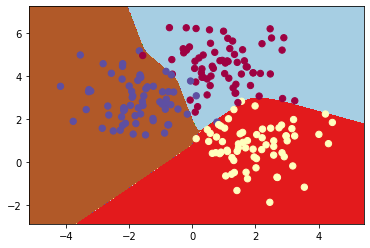

In [19]:
model = build_model5(3, x, y)
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict5(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

soal 7:

layeye 0 ra beyne voroodi va layeye 1 ezafe mikonim.
voroodiash az X ast va khoroojiash be layeye 1 miravad. ba haman raveshe ghabli voroodi ha va khorooji hayash ra hesab mikonim va az layeye voroodi be layeye 1 enteghal midahim. in dafe voroodie layeye 1 be jaye inke az voroodi X bashad az layeye 0 ast. va size W1 hast layeye 0 * layeye 1.
nn_hdim in dafe be jaye yek adad yek araye migirad ke adade avval size e layeye 0 va adade dovvom size e layeye 1 ra moshakhas mikonad.

mibinim ke kheili rahat tar mishavad model ra overfit kard.

ba taghire adade layeha mitavan be sadegi did ke 2 laye mitavanad shekl haye pichide tari ra besazad va dar natije tabe haye pichide tari ra pooshesh dahad.

In [191]:
def predict6(model, X):
  W0, b0, W1, b1, W2, b2 = model['W0'], model['b0'], model['W1'], model['b1'], model['W2'], model['b2']

  z0 = X.dot(W0) + b0
  a0 = np.tanh(z0)
  z1 = a0.dot(W1) + b1
  a1 = np.tanh(z1)
  z2 = a1.dot(W2) + b2
  exp_scores = np.exp(z2)
  probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
  return np.argmax(probs, axis = 1)

In [188]:
def build_model6(x, y, nn_hdim, num_passes = 20000, print_loss = False):
  global epsilon
  global nn_input_dim
  global nn_output_dim
  global num_examples
  np.random.seed(0)
  W0 = np.random.rand(nn_input_dim, nn_hdim[0]) / np.sqrt(nn_input_dim)
  b0 = np.zeros((1, nn_hdim[0]))
  W1 = np.random.rand(nn_hdim[0], nn_hdim[1]) / np.sqrt(nn_hdim[0])
  b1 = np.zeros((1, nn_hdim[1]))
  W2 = np.random.randn(nn_hdim[1], nn_output_dim) / np.sqrt(nn_hdim[1])
  b2 = np.zeros((1, nn_output_dim))

  model = {}

  for i in range(0, num_passes):
    z0 = x.dot(W0) + b0
    a0 = np.tanh(z0)
    z1 = a0.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)

    delta3 = probs
    delta3[range(num_examples), y] -= 1
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis = 0, keepdims = True)
    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
    dW1 = np.dot(a0.T, delta2)
    db1 = np.sum(delta2, axis = 0)
    delta1 = delta2.dot(W1.T) * (1 - np.power(a0, 2))
    dW0 = np.dot(x.T, delta1)
    db0 = np.sum(delta1, axis = 0)

    dW2 += reg_lambda * W2
    dW1 += reg_lambda * W1
    dW0 += reg_lambda * W0

    W0 += -epsilon * dW0
    b0 += -epsilon * db0
    W1 += -epsilon * dW1
    b1 += -epsilon * db1
    W2 += -epsilon * dW2
    b2 += -epsilon * db2

    model = {'W0': W0, 'b0': b0, 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

    if print_loss and i % 1000 == 0:
      print("Iteration: {} Loss: {}", i, calcualte_loss(model))

  return model

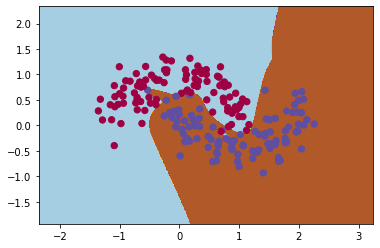

In [194]:
np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise = 0.20)
model = build_model6(x, y, [5, 5])
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict6(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

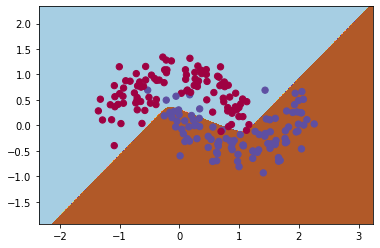

In [195]:
np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise = 0.20)
model = build_model6(x, y, [3, 3])
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict6(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)

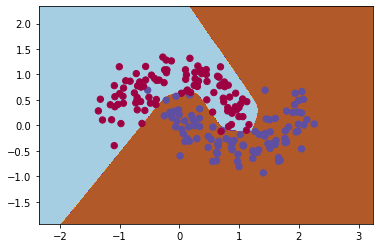

In [198]:
np.random.seed(0)
x, y = sklearn.datasets.make_moons(200, noise = 0.20)
model = build_model6(x, y, [4, 2])
min1, max1 = x[:, 0].min()-1, x[:, 0].max()+1
min2, max2 = x[:, 1].min()-1, x[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = predict6(model, grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
plt.scatter(x[:, 0], x[:, 1], s = 40, c = y, cmap = plt.cm.Spectral)